# Multi Layer Perceptron

In [1]:
%%bash

pip install jdc

  Using cached jdc-0.0.7-py2.py3-none-any.whl


In [2]:
# Library imports
import random
import numpy as np
import jdc
import sklearn
from datasets import *

We define a generic neural network architecture as a python class which we would use in multiple exercies. You might want to revisit the tutorial notebook for a quick refresher on python classes.

**Note:** We are using jdc to define each method of `class Network` in seperate cells. jdc follows the following syntax,

```py
%%add_to #CLASS_NAME#
def dummy_method(self):
```

In [3]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network. For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.initialize_biases()
        self.initialize_weights()

# Initialization

## 3.1.1 Initialize weights and biases

The biases and weights for the network are initialized randomly, using a Gaussian
distribution with mean 0, and variance 1. Note that the first layer is assumed to be an input layer, and by convention we won't set any biases for those neurons, since biases are only ever used in computing the outputs from later layers. Implement the following functions to initialize biases and weights.

**Hints:**
![](https://www.researchgate.net/profile/Michael_Frish/publication/241347660/figure/fig3/AS:298690993508361@1448224890429/Figure-3-The-structure-of-a-multilayer-perceptron-neural-network.png)
- Since we do not define biases for input layer, `len(self.biases)` array is equal to `len(self.sizes) - 1`.
- Every consecutive pair of layers in network have a set of weights connecting them. Hence the `len(self.weights)` would also be `len(self.sizes) - 1` .
- `np.random.randn` picks random variables form gaussian distribution.

In [4]:
%%add_to Network
def initialize_biases(self):
    # YOUR CODE HERE


In [5]:
%%add_to Network
def initialize_weights(self):
    # YOUR CODE HERE


# Training

We shall implement backpropagation with stochastic mini-batch gradient descent to optimize our network. 

In [6]:
%%add_to Network
def train(self, training_data, epochs, mini_batch_size, learning_rate):
    """Train the neural network using gradient descent.  
    ``training_data`` is a list of tuples ``(x, y)``
    representing the training inputs and the desired
    outputs.  The other parameters are self-explanatory."""

    # training_data is a list and is passed by reference
    # To prevernt affecting the original data we use 
    # this hack to create a copy of training_data
    # https://stackoverflow.com/a/2612815
    training_data = list(training_data)
    
    for i in range(epochs):
        # Get mini-batches    
        mini_batches = self.create_mini_batches(training_data, mini_batch_size)
        
        # Itterate over mini-batches to update pramaters   
        cost = sum(map(lambda mini_batch: self.update_params(mini_batch, learning_rate), mini_batches))
        
        # Find accuracy of the model at the end of epoch         
        acc = self.evaluate(training_data)
        
        print("Epoch {} complete. Total cost: {}, Accuracy: {}".format(i, cost, acc))

## 3.1.2 Create mini-batches

Split the training data into mini-batches of size `mini_batch_size` and return a list of mini-batches.

In [7]:
%%add_to Network
def create_mini_batches(self, training_data, mini_batch_size):
    # Shuffling data helps a lot in mini-batch SGD
    random.shuffle(training_data)
    # YOUR CODE HERE
    
    return mini_batches

## 3.1.3 Update weights and biases
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQ-BdgJQ_h-W6cvgvdp5Bv_YiC_oMVQ7Tsz6kecQm4SRTE6Zq0HUKbEFCNDtBKNR9-YS_i104TCXPaE/pub?w=601&amp;h=259">
P.S. Alpha is learning rate in case you still didn't get it :P

In [8]:
%%add_to Network
def update_params(self, mini_batch, learning_rate):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation."""
    
    # Initialize gradients     
    delta_b = [np.zeros(b.shape) for b in self.biases]
    delta_w = [np.zeros(w.shape) for w in self.weights]
    
    total_cost = 0
    
    for x, y in mini_batch:
        # Obtain the mean squared error and the gradients
        # with resepect to biases and weights        
        cost, del_b, del_w = self.backprop(x, y)
        
        # Add the gradients for each sample in mini-batch        
        delta_b = [nb + dnb for nb, dnb in zip(delta_b, del_b)]
        delta_w = [nw + dnw for nw, dnw in zip(delta_w, del_w)]
        
        total_cost += cost

    # Update self.biases and self.weights
    # using delta_b, delta_w and learning_rate    
    self.biases = [b - (learning_rate / len(mini_batch)) * db
                   for b, db in zip(self.biases, delta_b)]
    self.weights = [w - (learning_rate / len(mini_batch)) * dw
                    for w, dw in zip(self.weights, delta_w)]

    return total_cost

In [9]:
%%add_to Network
def backprop(self, x, y):
    """Return arry containiing cost, del_b, del_w representing the
    cost function C(x) and gradient for cost function.  ``del_b`` and
    ``del_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    # Forward pass
    zs, activations = self.forward(x)
    
    # Backward pass     
    cost, del_b, del_w = self.backward(activations, zs, y)

    return cost, del_b, del_w

## 3.1.5 Activation Functions
Implement functions to calculate sigmoid and it's derivative

In [10]:
%%add_to Network
def sigmoid(self, z):
    """The sigmoid function."""
    # YOUR CODE HERE


In [11]:
%%add_to Network
def sigmoid_derivative(self, z):
    """Derivative of the sigmoid function."""
    # YOUR CODE HERE


## 3.1.6 Implement forward propogration

<img src="https://docs.google.com/drawings/d/e/2PACX-1vRu0-T4iRYiif9UAVgEia-fLPd2c0FB4EOO_AiQzLGAU1gBadvscWUpKMG533PTSTXVqcagukcbHOK3/pub?w=656&amp;h=370">

Complete the following function to implement forward propagation

In [12]:
%%add_to Network
def forward(self, x):
    """Compute Z and activation for each layer."""
    
    # list to store all the activations, layer by layer
    zs = []
    
    # current activation
    activation = x
    # list to store all the activations, layer by layer
    activations = [x]
    
    # Loop through each layer to compute activations and Zs    
    for b, w in zip(self.biases, self.weights):
        # YOUR CODE HERE
        # Calculate z
        # watch out for the dimensions of multiplying matrices         
        z = 
        zs.append(z)
        # Calculate activation
        activation = 
        activations.append(activation)
        
    return zs, activations

## 3.1.7 Loss Function
Implement functions to calculate mean squared error and  it's derivative

In [13]:
%%add_to Network
def mse(self, output_activations, y):
    """Returns mean square error."""
    # YOUR CODE HERE


In [14]:
%%add_to Network
def mse_derivative(self, output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations. """
    # YOUR CODE HERE


## 3.1.8 Implement backward pass

Refer [this](http://colah.github.io/posts/2015-08-Backprop/) blog by Christopher Olah to understand how gradient computation happens during backward pass.

In [15]:
%%add_to Network
def backward(self, activations, zs, y):
    """Compute and return cost funcation, gradients for 
    weights and biases for each layer."""
    # Initialize gradient arrays
    del_b = [np.zeros(b.shape) for b in self.biases]
    del_w = [np.zeros(w.shape) for w in self.weights]
    
    # Compute for last layer
    cost = self.mse(activations[-1], y)
    
    # YOUR CODE HERE
    delta = 
    del_b[-1] = delta
    del_w[-1] = np.dot(delta, activations[-2].transpose())
    
    # Loop through each layer in reverse direction to 
    # populate del_b and del_w   
    for l in range(2, self.num_layers):

        delta = 
        del_b[-l] = delta
        del_w[-l] = np.dot(delta, activations[-l -1].transpose())
    
    return cost, del_b, del_w

In [16]:
%%add_to Network
def evaluate(self, test_data):
    """Return the accuracy of Network. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    test_results = [(np.argmax(self.forward(x)[1][-1]), np.argmax(y))
                    for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results) * 100 / len(test_results)

# Showtime

Let's test our implementation on a bunch of datasets.

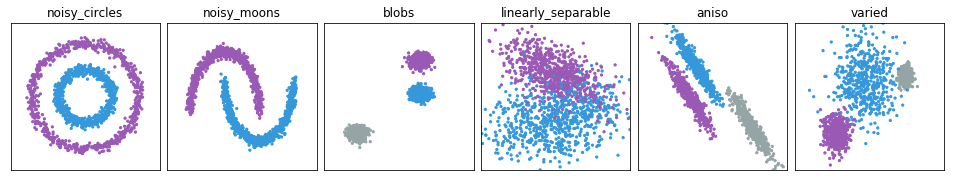

In [17]:
datasets = generate_datsets()

plot_datasets(datasets)

In [18]:
def pre_process_data(x, y):
    # Find number samples     
    n = len(y)
    # Find number classes
    c  = max(y) + 1
    
    # Normalize the input     
    x = sklearn.preprocessing.normalize(x)

    x = np.split(x, n)
    x = [a.reshape(-1, 1) for a in x]
    
    # Convert lables to one-hot vectors     
    one_hot = np.zeros([n, c])
    one_hot[range(n), y] = 1
    
    y = np.split(one_hot, n)
    y = [a.reshape(-1, 1) for a in y]
    
    return list(zip(x, y))

## 3.1.9 Try out different hyper-parameters

In [19]:
datasets_with_pred = {}

for name, dataset in datasets.items():
    
    print("Training dataset: {}".format(name))

    X, Y = dataset

    # Find number classes
    c  = max(Y) + 1
    
    # Pre-process the data
    # Checkout the implementation for some cool numpy tricks     
    training_data = pre_process_data(X, Y)
    
    network = Network([2, 7, c])
    
    network.train(training_data, 20, 10, 0.1)
    
    predictions = list(map(lambda sample: np.argmax(network.forward(sample[0])[1][-1]), training_data))
    
    datasets_with_pred[name] = X, Y, predictions

Training dataset: noisy_circles
Epoch 0 complete. Total cost: [ 383.03319836], Accuracy: 50.53333333333333
Epoch 1 complete. Total cost: [ 378.58816924], Accuracy: 49.86666666666667
Epoch 2 complete. Total cost: [ 378.08995759], Accuracy: 49.666666666666664
Epoch 3 complete. Total cost: [ 377.25256147], Accuracy: 49.8
Epoch 4 complete. Total cost: [ 377.32801174], Accuracy: 49.0
Epoch 5 complete. Total cost: [ 376.8536413], Accuracy: 48.93333333333333
Epoch 6 complete. Total cost: [ 376.55657352], Accuracy: 50.06666666666667
Epoch 7 complete. Total cost: [ 376.78337455], Accuracy: 50.6
Epoch 8 complete. Total cost: [ 376.36340442], Accuracy: 49.53333333333333
Epoch 9 complete. Total cost: [ 376.19180391], Accuracy: 50.13333333333333
Epoch 10 complete. Total cost: [ 376.34009926], Accuracy: 49.53333333333333
Epoch 11 complete. Total cost: [ 376.34022281], Accuracy: 49.733333333333334
Epoch 12 complete. Total cost: [ 376.25535685], Accuracy: 49.666666666666664
Epoch 13 complete. Total co

Epoch 14 complete. Total cost: [ 171.03421354], Accuracy: 89.66666666666667
Epoch 15 complete. Total cost: [ 168.12505668], Accuracy: 89.8
Epoch 16 complete. Total cost: [ 165.38740306], Accuracy: 89.8
Epoch 17 complete. Total cost: [ 163.00130397], Accuracy: 89.8
Epoch 18 complete. Total cost: [ 160.8061606], Accuracy: 89.66666666666667
Epoch 19 complete. Total cost: [ 159.00475855], Accuracy: 89.86666666666666


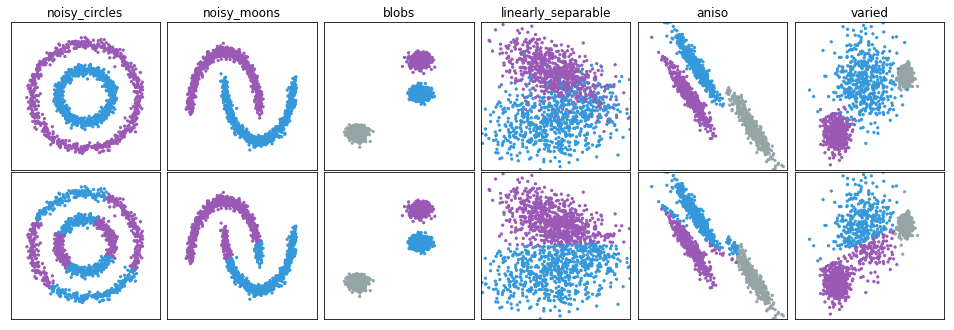

In [20]:
plot_datasets(datasets_with_pred)